# Image Classification (MobileNetV2, ImageNet)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will use a pre-trained [MobileNetV2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2) Tensorflow model to classify images. This model is trained using the [ImageNet](http://image-net.org/explore) dataset.

![image_classification_mobilenet_v2.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/image_classification_mobilenet_v2.jpg?raw=1)

## Importing dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pathlib](https://docs.python.org/3/library/pathlib.html) - for working with model files.

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.12.6
Tensorflow version: 2.17.0
Keras version: 3.5.0


## Loading the model

MobileNet v2 models for Keras: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [88]:
model = tf.keras.applications.Mo()
print(model)

AttributeError: module 'keras.api.applications' has no attribute 'MobileNetV3'

## Analyzing the model

In [62]:
import imageio.v2 as imageio
from keras.applications.mobilenet_v2 import preprocess_input

In [78]:
data = np.empty((1,224,224,3))

In [79]:
image = imageio.imread('apple.png')
# image_resized = tf.image.resize(image, [224, 224])
image_rgb = image[:, :, :3]
print(image_rgb.shape)

(224, 224, 3)


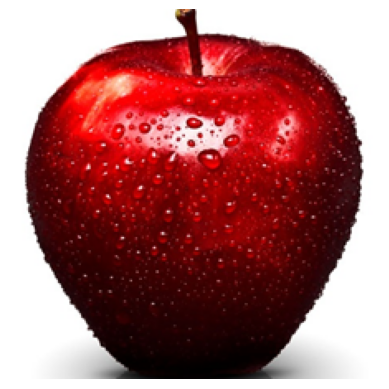

In [80]:
plt.imshow(image_rgb)
plt.axis('off')  # Optional: turn off the axis labels
plt.show()

In [81]:
data[0] = image_rgb
data = preprocess_input(data)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [82]:
data.min()

-1.0

In [83]:
predictions = model.predict(data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [84]:
predictions.shape

(1, 1000)

In [85]:
np.argmax(predictions,axis=1)

array([949], dtype=int64)

In [86]:
predictions[0][949]

0.4022925

In [87]:
from keras.applications.mobilenet_v2 import decode_predictions
decode_predictions(predictions,top=5)

# for name, desc, score in decode_predictions(predictions,top=5):
#     print('-{} ({:2f}%)'.format(desc,100*score))

[[('n07745940', 'strawberry', 0.4022925),
  ('n04522168', 'vase', 0.1450771),
  ('n07768694', 'pomegranate', 0.060541175),
  ('n03134739', 'croquet_ball', 0.059120245),
  ('n02948072', 'candle', 0.018604593)]]

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [5]:
INPUT_IMAGE_SIZE = model.get_input_shape_at(0)[1]
print('INPUT_IMAGE_SIZE:', INPUT_IMAGE_SIZE)

AttributeError: 'Functional' object has no attribute 'get_input_shape_at'

## Loading the labels

In [6]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]

10484/10484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print('Labels shape:', labels.shape)

Labels shape: (1000,)


In [8]:
print(labels)

['tench' 'goldfish' 'great white shark' 'tiger shark' 'hammerhead'
 'electric ray' 'stingray' 'cock' 'hen' 'ostrich' 'brambling' 'goldfinch'
 'house finch' 'junco' 'indigo bunting' 'robin' 'bulbul' 'jay' 'magpie'
 'chickadee' 'water ouzel' 'kite' 'bald eagle' 'vulture' 'great grey owl'
 'European fire salamander' 'common newt' 'eft' 'spotted salamander'
 'axolotl' 'bullfrog' 'tree frog' 'tailed frog' 'loggerhead'
 'leatherback turtle' 'mud turtle' 'terrapin' 'box turtle' 'banded gecko'
 'common iguana' 'American chameleon' 'whiptail' 'agama' 'frilled lizard'
 'alligator lizard' 'Gila monster' 'green lizard' 'African chameleon'
 'Komodo dragon' 'African crocodile' 'American alligator' 'triceratops'
 'thunder snake' 'ringneck snake' 'hognose snake' 'green snake'
 'king snake' 'garter snake' 'water snake' 'vine snake' 'night snake'
 'boa constrictor' 'rock python' 'Indian cobra' 'green mamba' 'sea snake'
 'horned viper' 'diamondback' 'sidewinder' 'trilobite' 'harvestman'
 'scorpion' 'blac

## Loading test images

In [9]:
def load_image(image_path):
    return tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
    )

In [10]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [11]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [12]:
TEST_IMAGES_DIR_PATH = pathlib.Path('data')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS

[]

In [13]:
test_images = []
for image_path in TEST_IMAGE_PATHS:
    # <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
    test_image = load_image(image_path)
    test_image_array = image_to_array(test_image)
    test_images.append(test_image_array)
    display_image(test_image_array)

In [14]:
print(test_images[1])

IndexError: list index out of range

## Preprocess test images

We need to preprocess images before using them with the model. By applying a `preprocess_input()` function to the image it will [scale](https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py#L18) pixels between `-1` and `1` and also will add additional batch dimension.

In [ ]:
def image_preprocess(image_array):
    return tf.keras.applications.mobilenet_v2.preprocess_input(
        image_array[tf.newaxis, ...]
    )

In [ ]:
test_images_preprocessed = []
for test_image in test_images:
    test_image_preprocessed = image_preprocess(test_image)
    test_images_preprocessed.append(test_image_preprocessed)

In [ ]:
print('Image shape before preprocessing:', test_images[0].shape)
print('Image shape after preprocessing:', test_images_preprocessed[0].shape)

In [ ]:
print(test_images_preprocessed[1])

## Classify one image

In [ ]:
def get_tags(probs, labels, max_classes = 5, prob_threshold = 0.01):
    probs_mask = probs > prob_threshold
    probs_filtered = probs[probs_mask] * 100
    labels_filtered = labels[probs_mask]

    sorted_index = np.flip(np.argsort(probs_filtered))
    labels_filtered = labels_filtered[sorted_index][:max_classes]
    probs_filtered = probs_filtered[sorted_index][:max_classes].astype(np.int)

    tags = ''
    for i in range(0, len(labels_filtered)):
        tags = tags + labels_filtered[i] + ' (' + str(probs_filtered[i]) + '%), '

    return tags, labels_filtered, probs_filtered

In [ ]:
TEST_IMAGE_INDEX = 1

In [ ]:
result = model(test_images_preprocessed[TEST_IMAGE_INDEX])

In [ ]:
result.shape

In [ ]:
print(result)

In [ ]:
np_result = result.numpy()[0]

In [ ]:
print(np_result)

In [ ]:
tags, labels_filtered, probs_filtered = get_tags(np_result, labels)

print('probs_filtered:', probs_filtered)
print('labels_filtered:', labels_filtered)
print('tags:', tags)

In [ ]:
plt.figure()
plt.title(tags)
plt.imshow(test_images[TEST_IMAGE_INDEX]);

plt.show()

## Classify many test images

In [ ]:
for image_index in range(0, len(test_images)):
    test_image = test_images[image_index]
    test_image_preprocessed = test_images_preprocessed[image_index]
    probabilities = model(test_image_preprocessed)
    tags, labels_filtered, probs_filtered = get_tags(probabilities.numpy()[0], labels)
    plt.figure()
    plt.title(tags)
    plt.imshow(test_image);

plt.show()

## Save the model

In [ ]:
model_name = 'image_classification_mobilenet_v2.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/image_classification_mobilenet_v2/image_classification_mobilenet_v2.h5 \
  ./demos/public/models/image_classification_mobilenet_v2
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.